# Phase 3 Project

## Introduction

In this project, 
As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. Your audience could be someone guiding those public health efforts.

This challenge: can you predict whether people got H1N1 and seasonal flu vaccines using data collected in the National 2009 H1N1 Flu Survey? This is a binary classification problem, but there are two potential targets: whether the survey respondent received the seasonal flu vaccine, or whether the respondent received the H1N1 flu vaccine. Please choose just one of these potential targets for your minimum viable project.
Need to edit this because it is copied word for word

# Business Understanding
The stakeholders or audience here is Public Health and the general public

## Objectives

You will be able to:

* Determine if a linear transformation would be useful for a specific model or set of data
* Identify an appropriate linear transformation technique for a specific model or set of data
* Apply linear transformations to independent and dependent variables in linear regression
* Interpret the coefficients of variables that have been transformed using a linear transformation

## SyriaTel DataSet

Let's look at the H1N1 and Seasonal data, where each record represents vaccination data

## 1. Import libraries and load datasets

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [56]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [57]:
df.shape

(3333, 21)

##### We have 3333 rows and 20 columns

In [58]:
#Getting a concise summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### From the data, we have booleans, floats, integers and categorical data, objects.

In [59]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [60]:
#lets check how many times each unique value appears in the 'churn' column
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

#### Exploratory Data Analysis

##### 1. Data Cleaning

In [61]:
#lets check for any missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

#### There are no missing values in this dataset. 

In [62]:
# Convert the categorical data, yes, no to binary data
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['international plan']

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international plan, Length: 3333, dtype: int64

In [63]:
#converting voice mail plan yes/no to binary
binary_column = ['voice mail plan']
for col in binary_column:
    df[col] = df[col].map({'yes': 1, 'no': 0})

    df[col]

##### Above we have converted the categorical data international plan and voice mail plan which were yes/no to binary data.

In [64]:
# Convert churn to binary if not already
df['churn'] = df['churn'].astype(int)
df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int32

##### Churn column was a float and now converted into binary for use in the modeling and evaluation

In [65]:
# Drop irrelevant columns that will not be in use
df.drop(['state', 'phone number'], axis=1, inplace=True)

##### In our analysis, state and phone number do not play any role in our analysis and subsequent prediction

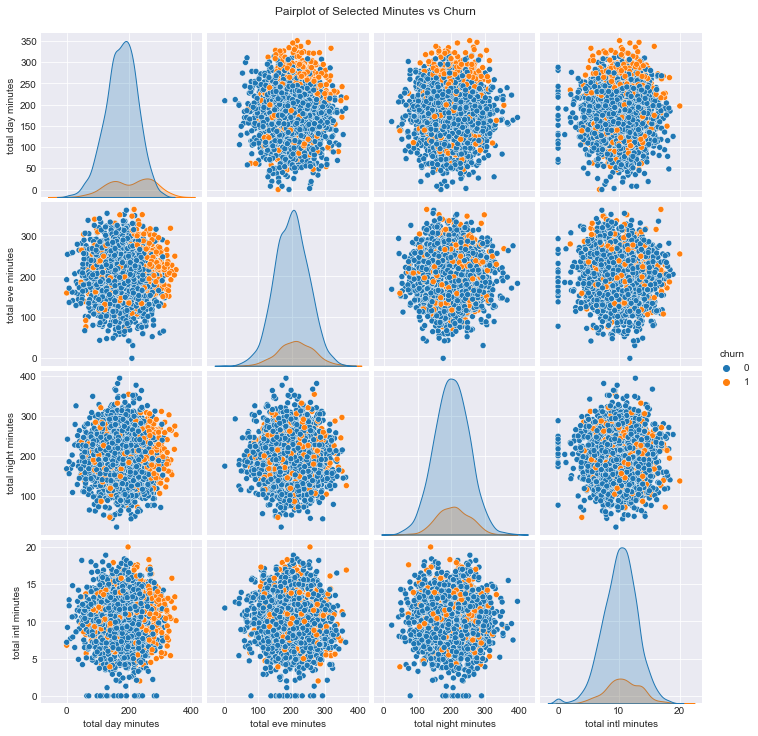

In [66]:
# Pairplot (only a few columns to avoid clutter)
sns.pairplot(df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'churn']], hue='churn')
plt.suptitle('Pairplot of Selected Minutes vs Churn', y=1.02)
plt.show()

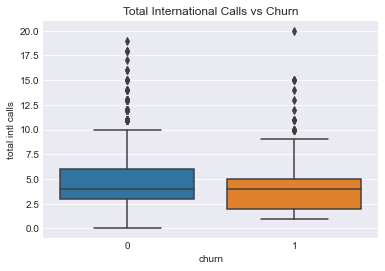

In [67]:
# Boxplot: total intl calls vs churn
sns.boxplot(x='churn', y='total intl calls', data=df)
plt.title('Total International Calls vs Churn')
plt.show()

##### Conclusion for EDA trial:
- From these visualizations, it appears that while some variables like 'total day minutes' show separation,others like 'total intl calls' do not give a clear distinction. Therefore, we may deprioritize those features during feature selection or give them less weight in interpretation.


### 3. Splitting features and target variables

In [68]:
# Feature and Target Split
X = df.drop('churn', axis=1)
y = df['churn']

### 4. Train Test and Split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.31148552,  1.73584027, -0.32662405, ..., -0.5939798 ,
         1.17261961, -0.42829331],
       [-0.85263157, -0.51716801, -0.32662405, ...,  0.63484856,
         0.92097103, -1.17556423],
       [-0.06811788, -0.51716801, -0.32662405, ..., -1.4131987 ,
        -1.22466428,  1.81351945],
       ...,
       [ 1.19722679, -0.51716801, -0.32662405, ..., -0.5939798 ,
        -0.1253573 , -0.42829331],
       [-0.65017643,  1.73584027, -0.32662405, ...,  1.04445801,
        -2.16503531,  1.06624853],
       [ 0.08372348, -0.51716801, -0.32662405, ...,  1.45406746,
         0.16602527, -0.42829331]])

#### 6. Model Training (Logistic Regression and Random Forest)

In [71]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [72]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### 7. Model Evaluation

In [73]:
#Evaluating the model
y_pred_lr = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


[[554  12]
 [ 83  18]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



##### According to the output:
- 554: Correctly predicted as not churned (True Negatives)
- 12: Incorrectly predicted as churned (False Positives)
- 83: Incorrectly predicted as not churned (False Negatives)
- 18: Correctly predicted as churned (True Positives)

For the Class Breakdown:
- Class 0: Not Churned
Precision = 0.87: 87% of predicted "not churned" were correct.
Recall = 0.98: 98% of actual "not churned" were identified correctly.
F1-score = 0.92: Strong performance.
- Class 1: Churned
Precision = 0.60: 60% of predicted "churned" were correct.
Recall = 0.18: Only 18% of actual churns were caught by the model.
F1-score = 0.27: Poor performance in identifying churners.

The overall accuracy that the model was correct on 86% of all predictions.
The model is however very biased towards predicting class 0 (not churned).
It struggles to identify actual churners (low recall for class 1).


In [74]:
#random forest evaluation
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[559   7]
 [ 31  70]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.91      0.69      0.79       101

    accuracy                           0.94       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667



- The model performs very well overall, especially for class 0. 
- It also performs much better on class 1 (churned) than before. 
- Recall for class 1 (69%) is decent, meaning it's catching a good number of churners.

#### Visualization ROC Curve


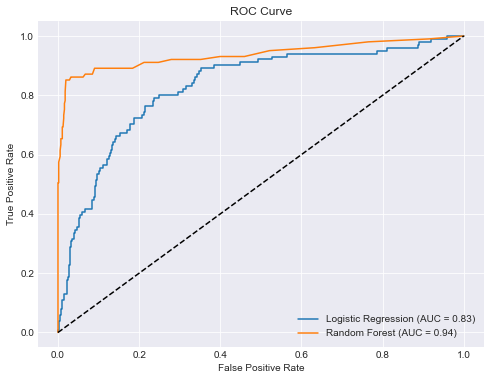

In [75]:
lr_probs = lr.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, lr_probs)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf_probs)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
